In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
import keras.utils as utils
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#load data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


the image label : [1]


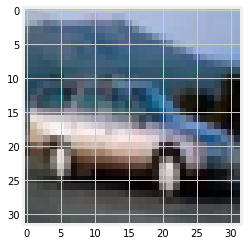

In [4]:
index = 4
img = plt.imshow(x_train[index])
print('the image label :',y_train[index])

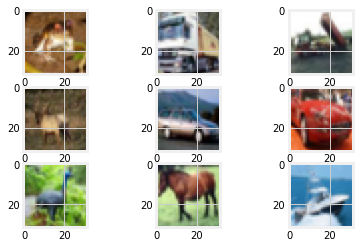

In [5]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i])
plt.show()

In [6]:
#Image labels encoding
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('the image class is:', classification[y_train[index][0]])

the image class is: automobile


In [7]:
#convert the labels into a set of 10 numbers to input into the Neural network
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

In [8]:
y_train_one_hot[index]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
#Normalize the pixels to be values between 0 and 1 
x_train = x_train / 255
x_test = x_test / 255

In [10]:
#Model1
model1 = Sequential()
model1.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )
model1.add(MaxPooling2D(pool_size= (2,2)))

model1.add( Conv2D(32, (5,5), activation='relu') )
model1.add(MaxPooling2D(pool_size= (2,2)))

model1.add(Flatten())

model1.add(Dense(1000, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(500, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(250, activation='relu'))

model1.add(Dense(10, activation='softmax'))

In [11]:
#VGG
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())

model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10, activation='softmax'))

In [12]:
opt1 = keras.optimizers.Adam(learning_rate=0.01)
model1.compile(loss = 'categorical_crossentropy', optimizer = opt1, metrics = ['accuracy'])
opt2 = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model2.compile(loss='categorical_crossentropy', optimizer = opt2,  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
hist1 = model1.fit(x_train, y_train_one_hot, batch_size= 256, epochs=50 , validation_split= 0.2 ) 

Epoch 1/50
157/157 [==============================] - 56s 350ms/step - loss: 2.3610 - accuracy: 0.1000 - val_loss: 2.3034 - val_accuracy: 0.1016
Epoch 2/50
157/157 [==============================] - 55s 347ms/step - loss: 2.3031 - accuracy: 0.0962 - val_loss: 2.3030 - val_accuracy: 0.0997
Epoch 3/50
157/157 [==============================] - 55s 348ms/step - loss: 2.3032 - accuracy: 0.0979 - val_loss: 2.3032 - val_accuracy: 0.0952
Epoch 4/50
157/157 [==============================] - 55s 349ms/step - loss: 2.3032 - accuracy: 0.0979 - val_loss: 2.3036 - val_accuracy: 0.0952
Epoch 5/50
157/157 [==============================] - 55s 352ms/step - loss: 2.3032 - accuracy: 0.0993 - val_loss: 2.3031 - val_accuracy: 0.0980
Epoch 6/50
157/157 [==============================] - 56s 356ms/step - loss: 2.3030 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.0997
Epoch 7/50
157/157 [==============================] - 55s 348ms/step - loss: 2.3031 - accuracy: 0.1008 - val_loss: 2.3025 - val_ac

In [14]:
hist2 = model2.fit(x_train, y_train_one_hot, batch_size= 256, epochs= 50, validation_split= 0.2 )

Epoch 1/50
157/157 [==============================] - 266s 2s/step - loss: 2.0651 - accuracy: 0.2560 - val_loss: 1.8681 - val_accuracy: 0.3255
Epoch 2/50
157/157 [==============================] - 265s 2s/step - loss: 1.7369 - accuracy: 0.3771 - val_loss: 1.7237 - val_accuracy: 0.3771
Epoch 3/50
157/157 [==============================] - 266s 2s/step - loss: 1.6087 - accuracy: 0.4218 - val_loss: 1.5878 - val_accuracy: 0.4289
Epoch 4/50
157/157 [==============================] - 265s 2s/step - loss: 1.5166 - accuracy: 0.4564 - val_loss: 1.4834 - val_accuracy: 0.4676
Epoch 5/50
157/157 [==============================] - 266s 2s/step - loss: 1.4430 - accuracy: 0.4839 - val_loss: 1.4506 - val_accuracy: 0.4886
Epoch 6/50
157/157 [==============================] - 266s 2s/step - loss: 1.3853 - accuracy: 0.5041 - val_loss: 1.4176 - val_accuracy: 0.4852
Epoch 7/50
157/157 [==============================] - 266s 2s/step - loss: 1.3486 - accuracy: 0.5217 - val_loss: 1.3648 - val_accuracy: 0.5171

In [15]:
#evaluation
model1.evaluate(x_test, y_test_one_hot)[1]
model2.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 17s 53ms/step - loss: 1.2791 - accuracy: 0.6603


0.6603000164031982

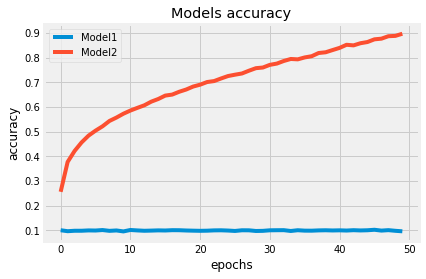

In [16]:
#visualize accuracy
plt.plot(hist1.history['accuracy'])
plt.plot(hist2.history['accuracy'])
plt.title('Models accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Model1','Model2'], loc='upper left')
plt.show()

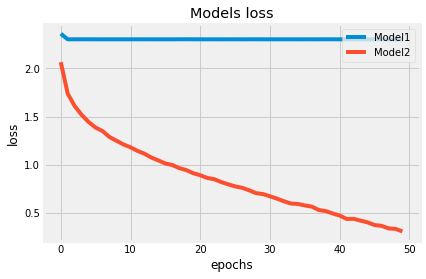

In [17]:
#visualize loss
plt.plot(hist1.history['loss'])
plt.plot(hist2.history['loss'])
plt.title('Models loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Model1','Model2'], loc='upper right')
plt.show()

In [18]:
#test with new image
from google.colab import files 
uploaded = files.upload()

Saving car.jpg to car.jpg


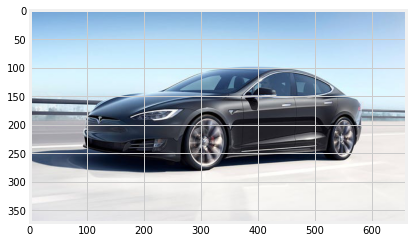

In [19]:
img = plt.imread('car.jpg')
img = plt.imshow(img)

In [20]:
import cv2
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [21]:
import cv2
img = cv2.imread('/content/gdrive/MyDrive/car.jpg')
img.shape

(372, 660, 3)

Resized Dimensions :  (32, 32, 3)


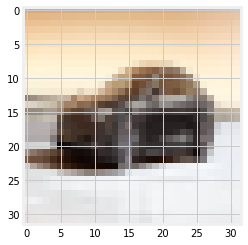

In [22]:
# resize image
resized = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',resized.shape)
img = plt.imshow(resized)

In [ ]:
resized

In [23]:
#get models predictions
prediction1 = model1.predict(np.array([resized]))
prediction1

array([[0.0991722 , 0.09932601, 0.09970715, 0.09608261, 0.10345139,
        0.09873509, 0.10420388, 0.09994628, 0.09664133, 0.10273408]],
      dtype=float32)

In [24]:
prediction2 = model2.predict(np.array([resized]))
prediction2

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
#sort the predictions 
list_index = [0,1,2,3,4,5,6,7,8,9]
x1 = prediction1
x2 = prediction2
for i in range(10):
  for j in range(10):
    if x1[0][list_index[i]] > x1[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

for i in range(10):
  for j in range(10):
    if x2[0][list_index[i]] > x2[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#print the first 3 predictions
for i in range(3):
  print('Model1, prediction', i+1, ' is :', classification[list_index[i]], ', about', round( prediction1[0][list_index[i]] , 5)*100  )
print('------------------------------------------------------------')
for i in range(3):
  print('Model2, prediction', i+1, ' is :', classification[list_index[i]], ', about', round( prediction2[0][list_index[i]] , 5)*100  )

Model1, prediction 1  is : automobile , about 9.933000057935715
Model1, prediction 2  is : deer , about 10.34500002861023
Model1, prediction 3  is : truck , about 10.272999852895737
------------------------------------------------------------
Model2, prediction 1  is : automobile , about 100.0
Model2, prediction 2  is : deer , about 0.0
Model2, prediction 3  is : truck , about 0.0


In [44]:
#done, both model1 and model2 do well.